## Model Training

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('data/stud.csv')

In [47]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## We will predict maths score, so our dependent variable or y is math_score

In [48]:
X = df.drop('math_score', axis=1)

In [49]:
y=df['math_score']

In [50]:
columns = [
    'gender',
    'race_ethnicity',
    'parental_level_of_education',
    'lunch',
    'test_preparation_course'
]

for col in columns:
    print(X[col].value_counts())
    print("+++"*30)

gender
female    518
male      482
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [51]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [52]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [53]:
## Create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numerical_transformer, num_features)
    ]
)

In [54]:
X = preprocessor.fit_transform(X)

In [55]:
X.shape

(1000, 19)

In [56]:
#separate dataset into train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, y_test.shape

((750, 19), (250,))

In [57]:
def evaluate_model(y_true, y_pred):
    mae=mean_absolute_error(y_true, y_pred)
    mse=mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2score=r2_score(y_true, y_pred)
    return mae, mse, rmse, r2score

In [58]:
models = {
    "Linear Regression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "SVR":SVR(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost":XGBRegressor(),
    "CatBoost":CatBoostRegressor()
}

model_list=[]
r2_list=[]

for key, value in models.items():
    model = value
    model.fit(X_train, y_train)

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_score = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_score = evaluate_model(y_test, y_test_pred)

    print(f"Model Training Metrics for model {key}:")
    model_list.append(key)
    print(f"  MAE  : {model_train_mae}")
    print(f"  MSE  : {model_train_mse}")
    print(f"  RMSE : {model_train_rmse}")
    print(f"  R2   : {model_train_score}")

    print("\nModel Testing Metrics:")
    print(f"  MAE  : {model_test_mae}")
    print(f"  MSE  : {model_test_mse}")
    print(f"  RMSE : {model_test_rmse}")
    print(f"  R2   : {model_test_score}")
    r2_list.append(model_test_score)

    print("+++"*30)


Model Training Metrics for model Linear Regression:
  MAE  : 4.238267465725306
  MSE  : 28.060804235684667
  RMSE : 5.297244966554281
  R2   : 0.8742732380399839

Model Testing Metrics:
  MAE  : 4.337930600167406
  MSE  : 30.058114626720368
  RMSE : 5.482528123659774
  R2   : 0.8778243107659013
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model Training Metrics for model Ridge:
  MAE  : 4.236822709293621
  MSE  : 28.06418045343843
  RMSE : 5.297563633731872
  R2   : 0.8742581108568038

Model Testing Metrics:
  MAE  : 4.335372419388228
  MSE  : 30.01731559123233
  RMSE : 5.478806037015029
  R2   : 0.8779901445296866
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Model Training Metrics for model Lasso:
  MAE  : 5.1837328384070265
  MSE  : 42.92226969117584
  RMSE : 6.551508962916547
  R2   : 0.8076862680441843

Model Testing Metrics:
  MAE  : 5.2217100046729215
  MSE  : 44.277520593556964
  RMSE : 6

In [59]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
1,Ridge,0.877990
0,Linear Regression,0.877824
9,CatBoost,0.854830
6,Random Forest,0.850961
7,AdaBoost,0.847145
8,XGBoost,0.836290
2,Lasso,0.820027
4,KNN,0.793207
5,Decision Tree,0.756332
3,SVR,0.723742


## Linear Regression

In [61]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred  = lin_model.predict(X_test)
score=r2_score(y_test, y_pred)*100
print(f"Accuracy of the model: {score}")


Accuracy of the model: 87.78243107659013


## Plot y_pred and y_test

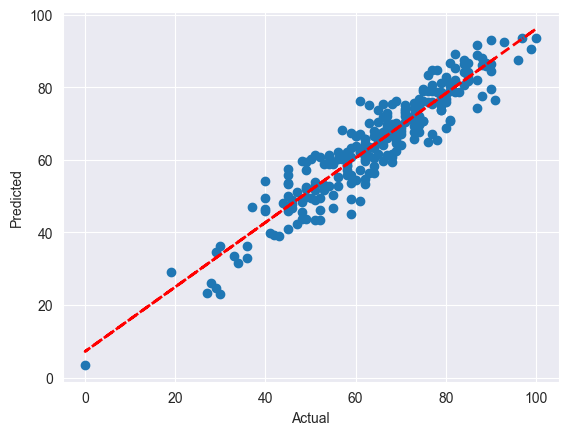

In [65]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, linestyle='--', linewidth=2, c='r')

plt.show()